In [6]:
#Classification: Linear Discriminant Analysis 
# predicting if they live past one year after getting infected

import pandas as pd #Importing pandas library
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
from sklearn.model_selection import train_test_split
import seaborn as sns  # Imorting Seaborn library
import os

data = pd.read_csv("Classification Staphylococcus_aureus_Infection_Data.csv")
data 

,AGE_GRP,ThirtyDay_Death,SixWeek_Death,ThreeMo_Death,SixMo_Death,NineMo_Death,OneYear_Death,Charlson_WIC,Protein 1,Protein 2,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
0,71-80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.161033,-0.189035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,51-60,False,False,False,False,False,False,0.0,0.216912,-0.150886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,51-60,False,False,False,False,False,False,2.0,0.000000,-0.701414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,71-80,True,True,True,True,True,True,4.0,0.224415,-0.053709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,61-70,False,False,False,False,False,False,5.0,-0.080960,-0.480949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,00-10,False,False,False,False,False,False,0.0,0.191297,-0.282302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6183,51-60,False,False,False,False,False,False,0.0,-0.091525,-0.369944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6184,61-70,False,False,True,True,True,True,9.0,0.131185,-0.507178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6185,00-10,False,False,False,False,False,False,0.0,-0.034182,-0.233550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [10]:
data.dropna(inplace=True) #dropping NaNs

data["OneYear_Death"] = data["OneYear_Death"].astype(int)




#assigning features to x and target to y
X = data.drop(["OneYear_Death", "AGE_GRP", "ThirtyDay_Death",	"SixWeek_Death",	"ThreeMo_Death",	"SixMo_Death",	"NineMo_Death" ], axis=1) #removed all the columns 
y = data['OneYear_Death'] #predicting this


print(X)


      Charlson_WIC  Protein 1  Protein 2  Protein 3  Protein 4  Protein 5  \
1              0.0   0.216912  -0.150886  -0.038081   0.069588   0.336442   
2              2.0   0.000000  -0.701414  -0.354478   0.135928  -0.349327   
3              4.0   0.224415  -0.053709  -0.025547   0.061783  -0.046513   
4              5.0  -0.080960  -0.480949  -0.345807   0.360044  -0.355281   
5              1.0   0.013984  -0.350237  -0.163590  -0.095393   0.161053   
...            ...        ...        ...        ...        ...        ...   
6182           0.0   0.191297  -0.282302  -0.086869  -0.236988   0.095155   
6183           0.0  -0.091525  -0.369944  -0.280567  -0.105545   1.575638   
6184           9.0   0.131185  -0.507178  -0.341122  -0.210575   0.005521   
6185           0.0  -0.034182  -0.233550  -0.491791  -0.271780  -0.334578   
6186           5.0   0.000000  -0.459694  -0.301578  -0.108739  -1.298877   

      Protein 6  Protein 7  Protein 8  Protein 9  ...  Protein 2084  \
1   

In [3]:
#splitting testing and training data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% of the data will be in the test set and the rest will be in the train set

from sklearn.metrics import classification_report
from sklearn import metrics



In [4]:
#implementing model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(x_train, y_train)
y_pred=lda.predict(x_test)


In [5]:
#training score
lda.score(x_train, y_train)*100

89.4523326572008

In [6]:
#testing score
lda.score(x_test, y_test)

62.25225225225225

<AxesSubplot:>

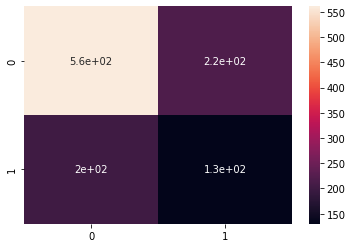

In [7]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True)